<a href="https://colab.research.google.com/github/drfperez/DeepPurpose/blob/main/SwissdockAnalysisOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload CSV files one by one. Press Cancel to stop uploading.


Saving deltaG_values.csv to deltaG_values (10).csv


Saving deltaG_values (1).csv to deltaG_values (1) (9).csv


Enter the real chemical name for Compound A: Ginkgolide B
Enter the real chemical name for Compound B: Ginkgolide Y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

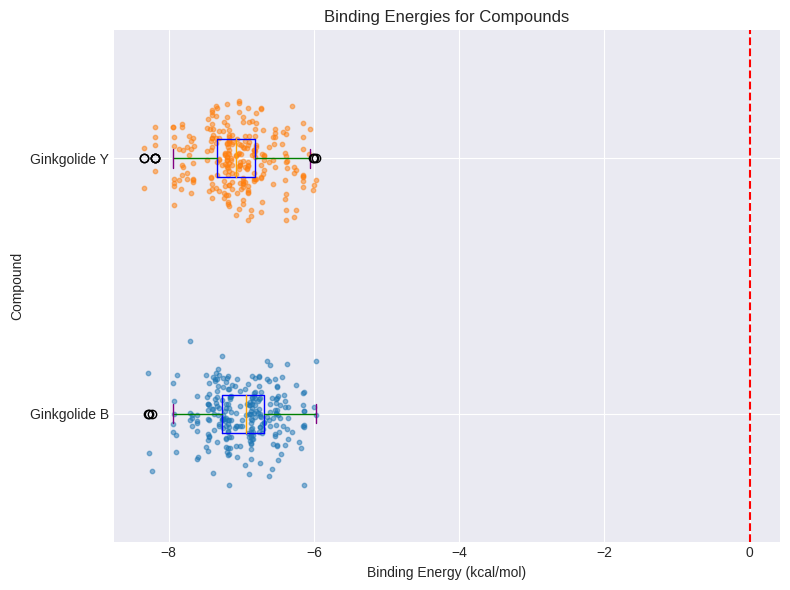

In [ ]:


from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Save the transposed DataFrame to a new CSV file
transposed_csv_path = 'transposed_data.csv'
transposed_df.to_csv(transposed_csv_path)

# Prompt the user to enter real chemical names for each compound
real_names_mapping = {}
for i, df_name in enumerate(transposed_df.columns):
    real_name = input(f"Enter the real chemical name for {df_name}: ")
    real_names_mapping[df_name] = real_name

# Create a customized boxplot for compounds
plt.figure(figsize=(8, 6))

# Set colors
box_color = 'blue'
median_color = 'orange'
whisker_color = 'green'
cap_color = 'purple'

# Create a boxplot
boxprops = dict(color=box_color)
medianprops = dict(color=median_color)
whiskerprops = dict(color=whisker_color)
capprops = dict(color=cap_color)
boxplot = transposed_df.boxplot(vert=False, return_type='dict', boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

# Overlay individual data points
for df_name in transposed_df.columns:
    y = np.random.normal(list(transposed_df.columns).index(df_name) + 1, 0.1, size=len(transposed_df[df_name]))
    plt.scatter(transposed_df[df_name], y, alpha=0.5, s=10)

# Set ticks and labels
plt.yticks(np.arange(1, len(transposed_df.columns) + 1), [real_names_mapping[col] for col in transposed_df.columns])

plt.xlabel('Binding Energy (kcal/mol)')
plt.ylabel('Compound')
plt.title('Binding Energies for Compounds')
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--')  # Add line at 0 for reference
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'boxplot.png'
plt.savefig(plot_image_path)

# Download the transposed CSV file and the plot image
files.download(transposed_csv_path)
files.download(plot_image_path)

Upload CSV files one by one. Press Cancel to stop uploading.


Saving deltaG_values.csv to deltaG_values (12).csv


Saving deltaG_values (1).csv to deltaG_values (1) (11).csv


Enter customized name for Compound A: Ginkgòlid B
Enter customized name for Compound B: Ginkgòlid Y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Mean,Standard Deviation,Minimum,Maximum,Number of Data
Compound,,,,,
Compound A,-6.986684,0.448293,-8.282232,-5.976542,256
Compound B,-7.070119,0.476528,-8.343674,-5.966561,256


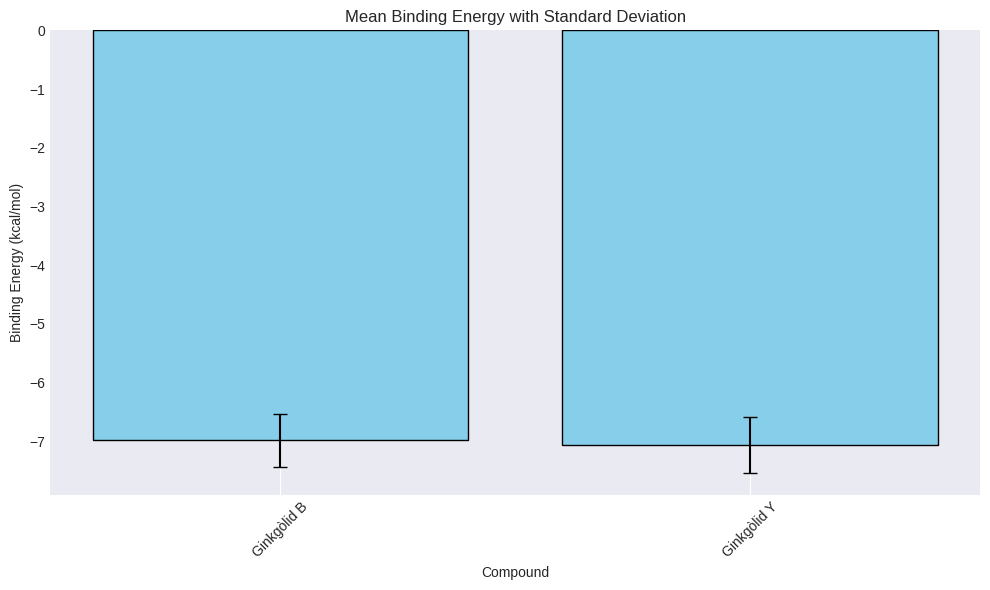

In [ ]:


from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Prompt the user to enter customized names for each compound
custom_names_mapping = {}
for i, df_name in enumerate(transposed_df.columns):
    custom_name = input(f"Enter customized name for {df_name}: ")
    custom_names_mapping[df_name] = custom_name

# Calculate statistics for each compound
statistics_df = pd.DataFrame({
    'Mean': transposed_df.mean(),
    'Standard Deviation': transposed_df.std(),
    'Minimum': transposed_df.min(),
    'Maximum': transposed_df.max(),
    'Number of Data': transposed_df.count()
})

# Save statistics to a CSV file
statistics_csv_path = 'compound_statistics.csv'
statistics_df.to_csv(statistics_csv_path)

# Create a bar graph with mean and standard deviation
plt.figure(figsize=(10, 6))
mean_values = statistics_df['Mean']
std_values = statistics_df['Standard Deviation']
plt.bar([custom_names_mapping[col] for col in mean_values.index], mean_values, yerr=std_values, capsize=5, color='skyblue', edgecolor='black')
plt.xlabel('Compound')
plt.ylabel('Binding Energy (kcal/mol)')
plt.title('Mean Binding Energy with Standard Deviation')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'mean_with_std_bar_plot.png'
plt.savefig(plot_image_path)

# Download the transposed DataFrame, statistics CSV file, and plot image
files.download(statistics_csv_path)
files.download(plot_image_path)

# Display the statistics DataFrame
statistics_df